## Final Project

Sections required in your report:

- Brief description of the data set and a summary of its attributes
- Initial plan for data exploration
- Actions taken for data cleaning and feature engineering
- Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

- Formulating at least 3 hypothesis about this data
- Conducting a formal significance test for one of the hypotheses and discuss the results 
- Suggestions for next steps in analyzing this data
- A paragraph that summarizes the quality of this data set and a request for additional data if needed

In [2]:
import os
import numpy as np
import pandas as pd

%pylab inline
%config InlineBackend.figure_formats = ['retina']


Populating the interactive namespace from numpy and matplotlib


### Brief description of the data-set and its attributes
The dataset used in this work is the Chicago Public Schools Progress Report for the 2015/2016 school year. It provides information about all public schools in Chicago and also provides key metrics about school quality such as test score performance, attendance, and satisfaction survey data. 

The dataset was downloaded from the [City of Chicago Open Data Portal](https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY1/fvrx-esxp/data).

The data set is a CSV file with 153 columns containing information for 670 schools. For each school 153 parameters are being recorded. Some features are numeric, while other features are categorical. There are also features that are plain text, which will not be included in the analysis. Since the dataset includes all public schools in Chicago, there are several features that only apply to certain school times (example: grade specific test results). 

In [3]:
filepath = "data/Chicago_Public_Schools_-_School_Progress_Reports_SY1516.csv"
data = pd.read_csv(filepath)
data.head()

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,...,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,Location
0,610547,SOUTH SHORE INTL HS,South Shore Intl College Prep High School,Selective enrollment,HS,1955 E 75TH ST,Chicago,Illinois,60649,7.735358e+09,...,7.7,NaN,This School Progress Report is currently under...,This school is “Organized for Improvement” whi...,NOT RATED,This school is in the process of being reviewe...,2015.0,41.758792,-87.576353,"1955 E 75TH ST\nChicago, Illinois 60649\n(41.7..."
1,400097,NOBLE - BULLS HS,Noble - Chicago Bulls College Prep,Charter,HS,2040 W ADAMS ST,Chicago,Illinois,60612,7.735348e+09,...,7.3,NaN,This School Progress Report is currently under...,This school is “Well-Organized for Improvement...,NOT RATED,This school is in the process of being reviewe...,2015.0,41.878809,-87.678195,"2040 W ADAMS ST\nChicago, Illinois 60612\n(41...."
2,610515,DISNEY II ES,Disney II Magnet School,Magnet,ES,3815 N KEDVALE AVE,Chicago,Illinois,60641,7.735344e+09,...,3.1,NaN,This School Progress Report is currently under...,This school is “Well-Organized for Improvement...,NOT RATED,This school is in the process of being reviewe...,2015.0,41.950461,-87.730678,"3815 N KEDVALE AVE\nChicago, Illinois 60641\n(..."
3,609997,HOLMES,Oliver Wendell Holmes Elementary School,Neighborhood,ES,955 W GARFIELD BLVD,Chicago,Illinois,60621,7.735359e+09,...,63.4,NaN,This School Progress Report is currently under...,This school is “Moderately Organized for Impro...,NOT RATED,This school is in the process of being reviewe...,2015.0,41.793788,-87.649795,"955 W GARFIELD BLVD\nChicago, Illinois 60621\n..."
4,609678,JONES HS,William Jones College Preparatory High School,Selective enrollment,HS,700 S STATE ST,Chicago,Illinois,60605,7.735349e+09,...,0.5,NaN,This School Progress Report is currently under...,This school is “Organized for Improvement” whi...,NOT RATED,This school is in the process of being reviewe...,2015.0,41.873066,-87.627675,"700 S STATE ST\nChicago, Illinois 60605\n(41.8..."


In [9]:
print(data.shape[0])

# Column names
#print(data.columns.tolist())

# data types
data.dtypes.value_counts()

670


float64    81
object     69
int64       3
dtype: int64

In [11]:
data.describe(include = 'all')

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,...,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,Location
count,670.000000,670,670,670,670,670,670,670,670.000000,6.690000e+02,...,545.000000,0.0,670,666,666,666,666.000000,670.000000,670.000000,670
unique,NaN,670,670,12,3,641,1,1,NaN,NaN,...,NaN,NaN,52,6,4,4,NaN,NaN,NaN,670
top,NaN,TAFT HS,Adam Clayton Powell Paideia Community Academy ES,Neighborhood,ES,3120 S KOSTNER AVE,Chicago,Illinois,NaN,NaN,...,NaN,NaN,This School Progress Report is currently under...,This school is “Well-Organized for Improvement...,NOT RATED,This school is in the process of being reviewe...,NaN,NaN,NaN,"5300 S HERMITAGE AVE\nChicago, Illinois 60609\..."
freq,NaN,1,1,400,472,4,670,670,NaN,NaN,...,NaN,NaN,616,262,648,648,NaN,NaN,NaN,1
mean,567444.725373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60629.855224,7.545986e+09,...,20.135963,NaN,NaN,NaN,NaN,NaN,2014.998498,41.841362,-87.677351,NaN
std,84517.909035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.305696,9.160682e+08,...,15.476888,NaN,NaN,NaN,NaN,NaN,0.038749,0.088803,0.057603,NaN
min,400009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60602.000000,2.156691e+09,...,0.400000,NaN,NaN,NaN,NaN,NaN,2014.000000,41.653663,-87.841041,NaN
25%,609727.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60618.000000,7.735343e+09,...,9.400000,NaN,NaN,NaN,NaN,NaN,2015.000000,41.771115,-87.715789,NaN
50%,609958.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60625.000000,7.735349e+09,...,16.200000,NaN,NaN,NaN,NaN,NaN,2015.000000,41.845962,-87.677589,NaN
75%,610178.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60640.000000,7.735355e+09,...,27.800000,NaN,NaN,NaN,NaN,NaN,2015.000000,41.907797,-87.639862,NaN


## Initial plan for data exploration

To get an initial overview about the data, I will select a subset of columns relating to school performance that have numerical or categorical values and will review descriptive statistics such as mean, range, median as well as value counts for categorical data. I will also assess whether there is missing data and treat missing data accordinly by either elimination of the rows or gap filling with mean values. I will also create correlation plots between variables using seaborn. 



## Actions taken for data cleaning and feature engineering

I have selected a subset of numeric and categorical features including: 
- school type
- attainment rating
- culture climate rateing
- survey response rate
- healthy school certification
- suspension rate
- student attendance
- teacher attendance
- dropout rate
- freshman on track track

These data columns were also renamed to facilitate the analysis. 
I have not removed data with missing values (since for example dropout rate does not apply to elementary schools), but this should be done at a later stage depending on the further desired analysis. 

Regarding feature engineering:
1. categorical data (healthy school certification, attainment rating, school type) were encoded to numeric data using one-hot-encoding. 
2. columns with high skew (Suspensions, Dropout_Rate, Response_Rate, Student_Attend) were log transformed to improve normality. 

In [13]:
columns    = ['Short_Name', 'School_Type','Student_Attainment_Rating','Culture_Climate_Rating','School_Survey_Student_Response_Rate_Pct', 
             'Healthy_School_Certification', 'Suspensions_Per_100_Students_Year_1_Pct',
             'Student_Attendance_Year_1_Pct','Teacher_Attendance_Year_1_Pct',
             'One_Year_Dropout_Rate_Year_1_Pct','Freshmen_On_Track_School_Pct_Year_1'] 

new_names = {'Student_Attainment_Rating':'Attainment',
             'Culture_Climate_Rating': 'Climate',
             'School_Survey_Student_Response_Rate_Pct': 'Response_Rate', 
             'Healthy_School_Certification': 'Healthy_School',
            'Suspensions_Per_100_Students_Year_1_Pct': 'Suspensions',
             'Student_Attendance_Year_1_Pct': 'Student_Attend',
            'Teacher_Attendance_Year_1_Pct': 'Teacher_Attend',
             'One_Year_Dropout_Rate_Year_1_Pct': 'Dropout_Rate',
             'Freshmen_On_Track_School_Pct_Year_1': 'Freshman_OnTrack'}

subset_data = data[columns].copy()
subset_data.rename(columns=new_names ,inplace=True)
subset_data.head()

,Short_Name,School_Type,Attainment,Climate,Response_Rate,Healthy_School,Suspensions,Student_Attend,Teacher_Attend,Dropout_Rate,Freshman_OnTrack
0,SOUTH SHORE INTL HS,Selective enrollment,BELOW AVERAGE,ORGANIZED,81.1,NOT CERTIFIED,16.5,90.5,95.2,2.0,91.8
1,NOBLE - BULLS HS,Charter,ABOVE AVERAGE,WELL ORGANIZED,59.3,NOT CERTIFIED,NaN,93.4,NaN,7.4,NaN
2,DISNEY II ES,Magnet,FAR ABOVE AVERAGE,WELL ORGANIZED,99.9,HEALTHY SCHOOLS CERTIFIED,0.5,97.3,96.2,NaN,NaN
3,HOLMES,Neighborhood,FAR BELOW AVERAGE,MODERATELY ORGANIZED,95.6,HEALTHY SCHOOLS CERTIFIED,9.0,92.6,94.5,NaN,NaN
4,JONES HS,Selective enrollment,FAR ABOVE AVERAGE,ORGANIZED,83.8,HEALTHY SCHOOLS CERTIFIED,1.3,93.9,95.3,0.2,97.9


In [14]:
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Short_Name        670 non-null    object 
 1   School_Type       670 non-null    object 
 2   Attainment        666 non-null    object 
 3   Climate           666 non-null    object 
 4   Response_Rate     651 non-null    float64
 5   Healthy_School    666 non-null    object 
 6   Suspensions       507 non-null    float64
 7   Student_Attend    647 non-null    float64
 8   Teacher_Attend    513 non-null    float64
 9   Dropout_Rate      173 non-null    float64
 10  Freshman_OnTrack  88 non-null     float64
dtypes: float64(6), object(5)
memory usage: 57.7+ KB


In [15]:
stats_df = subset_data.describe()
stats_df = subset_data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Response_Rate,Suspensions,Student_Attend,Teacher_Attend,Dropout_Rate,Freshman_OnTrack
mean,83.113364,16.704339,92.365842,95.534113,12.653179,82.188636
25%,76.950000,2.600000,92.300000,95.000000,3.100000,74.650000
median,91.100000,7.000000,94.700000,95.600000,5.800000,84.050000
75%,98.850000,18.850000,95.700000,96.100000,14.200000,91.725000
range,99.900000,281.000000,59.100000,6.000000,99.800000,48.600000


In [16]:
subset_data

,Short_Name,School_Type,Attainment,Climate,Response_Rate,Healthy_School,Suspensions,Student_Attend,Teacher_Attend,Dropout_Rate,Freshman_OnTrack
0,SOUTH SHORE INTL HS,Selective enrollment,BELOW AVERAGE,ORGANIZED,81.1,NOT CERTIFIED,16.5,90.5,95.2,2.0,91.8
1,NOBLE - BULLS HS,Charter,ABOVE AVERAGE,WELL ORGANIZED,59.3,NOT CERTIFIED,NaN,93.4,NaN,7.4,NaN
2,DISNEY II ES,Magnet,FAR ABOVE AVERAGE,WELL ORGANIZED,99.9,HEALTHY SCHOOLS CERTIFIED,0.5,97.3,96.2,NaN,NaN
3,HOLMES,Neighborhood,FAR BELOW AVERAGE,MODERATELY ORGANIZED,95.6,HEALTHY SCHOOLS CERTIFIED,9.0,92.6,94.5,NaN,NaN
4,JONES HS,Selective enrollment,FAR ABOVE AVERAGE,ORGANIZED,83.8,HEALTHY SCHOOLS CERTIFIED,1.3,93.9,95.3,0.2,97.9
...,...,...,...,...,...,...,...,...,...,...,...
665,SHERWOOD,Neighborhood,FAR ABOVE AVERAGE,WELL ORGANIZED,99.9,NOT CERTIFIED,5.8,95.0,97.6,NaN,NaN
666,PARK MANOR,Neighborhood,BELOW AVERAGE,WELL ORGANIZED,87.7,NOT CERTIFIED,2.9,96.0,95.5,NaN,NaN
667,HOLDEN,Neighborhood,ABOVE AVERAGE,WELL ORGANIZED,88.6,NOT CERTIFIED,4.4,94.5,95.5,NaN,NaN
668,BOUCHET,Neighborhood,AVERAGE,WELL ORGANIZED,99.9,HEALTHY SCHOOLS CERTIFIED,20.7,94.0,96.2,NaN,NaN


In [19]:
subset_data.describe()

,Response_Rate,Suspensions,Student_Attend,Teacher_Attend,Dropout_Rate,Freshman_OnTrack
count,651.000000,507.000000,647.000000,513.000000,173.000000,88.000000
mean,83.113364,16.704339,92.365842,95.534113,12.653179,82.188636
std,22.067952,29.733338,6.646083,0.842352,15.967462,12.197045
min,0.000000,0.100000,39.000000,92.200000,0.200000,51.400000
25%,76.950000,2.600000,92.300000,95.000000,3.100000,74.650000
50%,91.100000,7.000000,94.700000,95.600000,5.800000,84.050000
75%,98.850000,18.850000,95.700000,96.100000,14.200000,91.725000
max,99.900000,281.100000,98.100000,98.200000,100.000000,100.000000


In [21]:
subset_data.describe(include='object')

,Short_Name,School_Type,Attainment,Climate,Healthy_School
count,670,670,666,666,666
unique,670,12,6,6,2
top,TAFT HS,Neighborhood,BELOW AVERAGE,WELL ORGANIZED,NOT CERTIFIED
freq,1,400,183,262,379


In [22]:
subset_data.Attainment.value_counts()

BELOW AVERAGE        183
AVERAGE              157
ABOVE AVERAGE        110
FAR ABOVE AVERAGE     89
FAR BELOW AVERAGE     73
NO DATA AVAILABLE     54
Name: Attainment, dtype: int64

In [57]:
subset_data.groupby('Attainment').agg(['mean', 'median'])  # passing a list of recognized strings
subset_data.groupby('Attainment').agg([np.mean, np.median]) 

Response_Rate        Suspensions        Student_Attend  \
                           mean median        mean median           mean   
Attainment                                                                 
ABOVE AVERAGE         86.352294  94.60    6.494253   3.90      95.446364   
AVERAGE               84.463462  94.65    8.280645   4.80      94.796178   
BELOW AVERAGE         83.724725  87.30   26.836000  17.50      91.316575   
FAR ABOVE AVERAGE     91.667045  95.20    2.874684   1.90      95.782022   
FAR BELOW AVERAGE     78.568116  81.90   44.926316  23.10      85.575362   
NO DATA AVAILABLE     59.410638  58.10    6.400000   6.05      83.439024   

                         Teacher_Attend        Dropout_Rate         \
                  median           mean median         mean median   
Attainment                                                           
ABOVE AVERAGE      95.55      95.752273  95.70     2.833333    2.3   
AVERAGE            95.20      95.552846  95.60     3.917241    3.4   
BELOW AVERAGE      93.00      95.416438  95.40     6.957971    5.5   
FAR ABOVE AVERAGE  95.70      95.922989  96.00     0.700000    0.6   
FAR BELOW AVERAGE  91.00      94.927273  95.00    23.164516   17.4   
NO DATA AVAILABLE  85.20      95.192857  95.25    25.960606   30.6   

                  Freshman_OnTrack         
                              mean median  
Attainment                                 
ABOVE AVERAGE            92.600000  94.50  
AVERAGE                  89.871429  90.35  
BELOW AVERAGE            79.676087  79.40  
FAR ABOVE AVERAGE        97.380000  97.90  
FAR BELOW AVERAGE        71.893333  75.50  
NO DATA AVAILABLE        93.240000  96.30

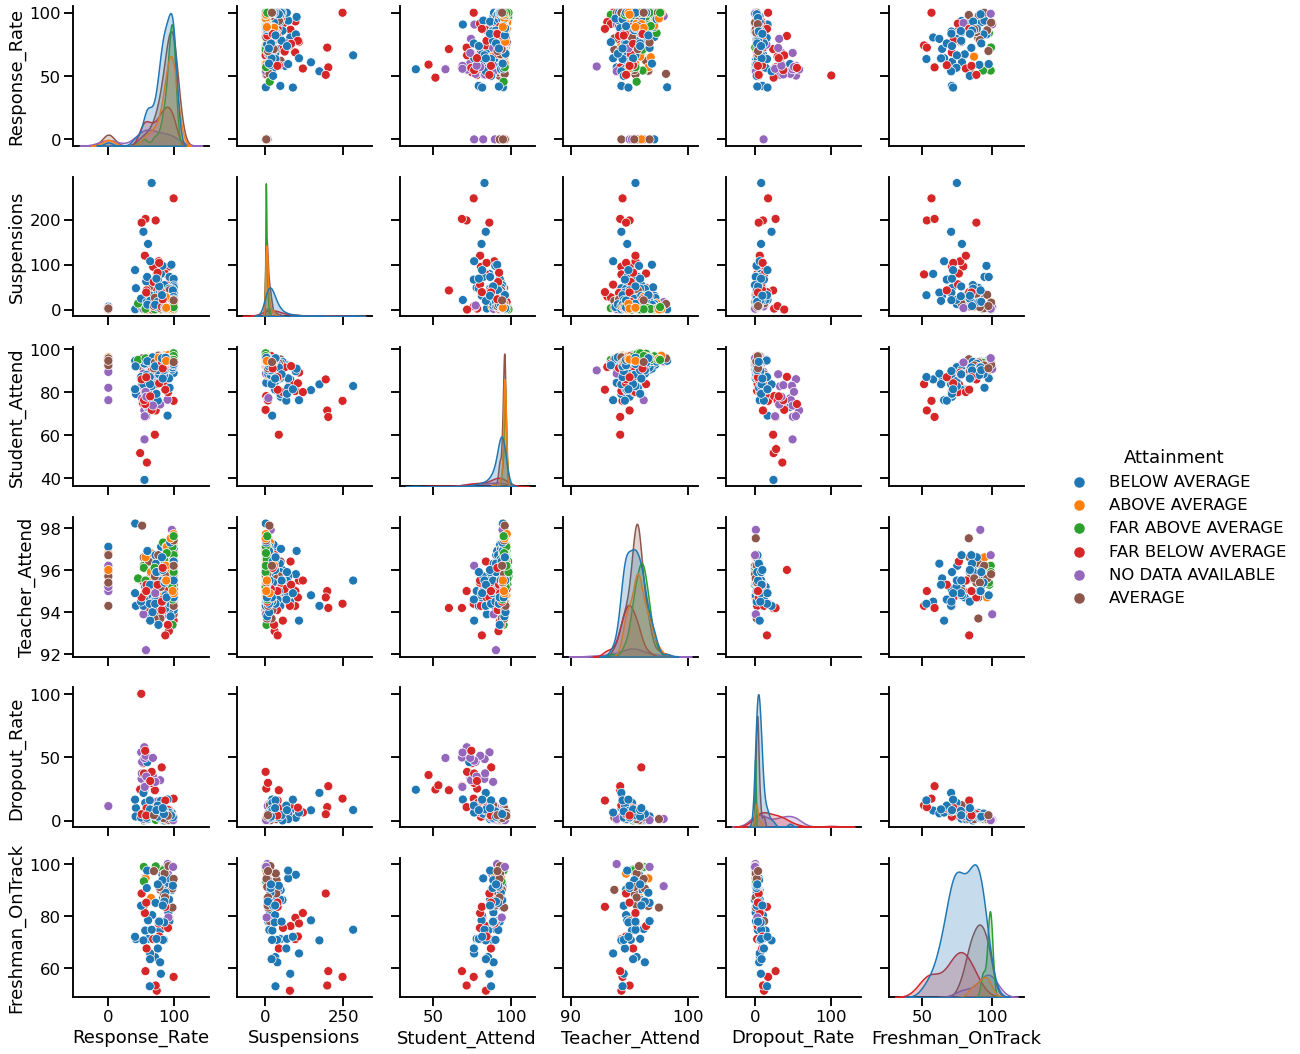

In [58]:
import seaborn as sns

sns.set_context('talk')
sns.pairplot(subset_data,hue='Attainment');

## Feature Engineering


In [61]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = subset_data.dtypes[subset_data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

subset_data = pd.get_dummies(subset_data, columns=one_hot_encode_cols, drop_first=True)
subset_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Response_Rate,651.0,83.113364,22.067952,0.0,76.95,91.1,98.85,99.9
Suspensions,507.0,16.704339,29.733338,0.1,2.60,7.0,18.85,281.1
Student_Attend,647.0,92.365842,6.646083,39.0,92.30,94.7,95.70,98.1
Teacher_Attend,513.0,95.534113,0.842352,92.2,95.00,95.6,96.10,98.2
Dropout_Rate,173.0,12.653179,15.967462,0.2,3.10,5.8,14.20,100.0
...,...,...,...,...,...,...,...,...
Climate_NOT YET ORGANIZED,670.0,0.077612,0.267760,0.0,0.00,0.0,0.00,1.0
Climate_ORGANIZED,670.0,0.273134,0.445902,0.0,0.00,0.0,1.00,1.0
Climate_PARTIALLY ORGANIZED,670.0,0.128358,0.334738,0.0,0.00,0.0,0.00,1.0
Climate_WELL ORGANIZED,670.0,0.391045,0.488349,0.0,0.00,0.0,1.00,1.0


In [62]:
mask = subset_data.dtypes == np.float
float_cols = subset_data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = subset_data[float_cols].skew()

In [63]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Suspensions,4.691515
Dropout_Rate,2.118633
Response_Rate,-2.187346
Student_Attend,-3.508914


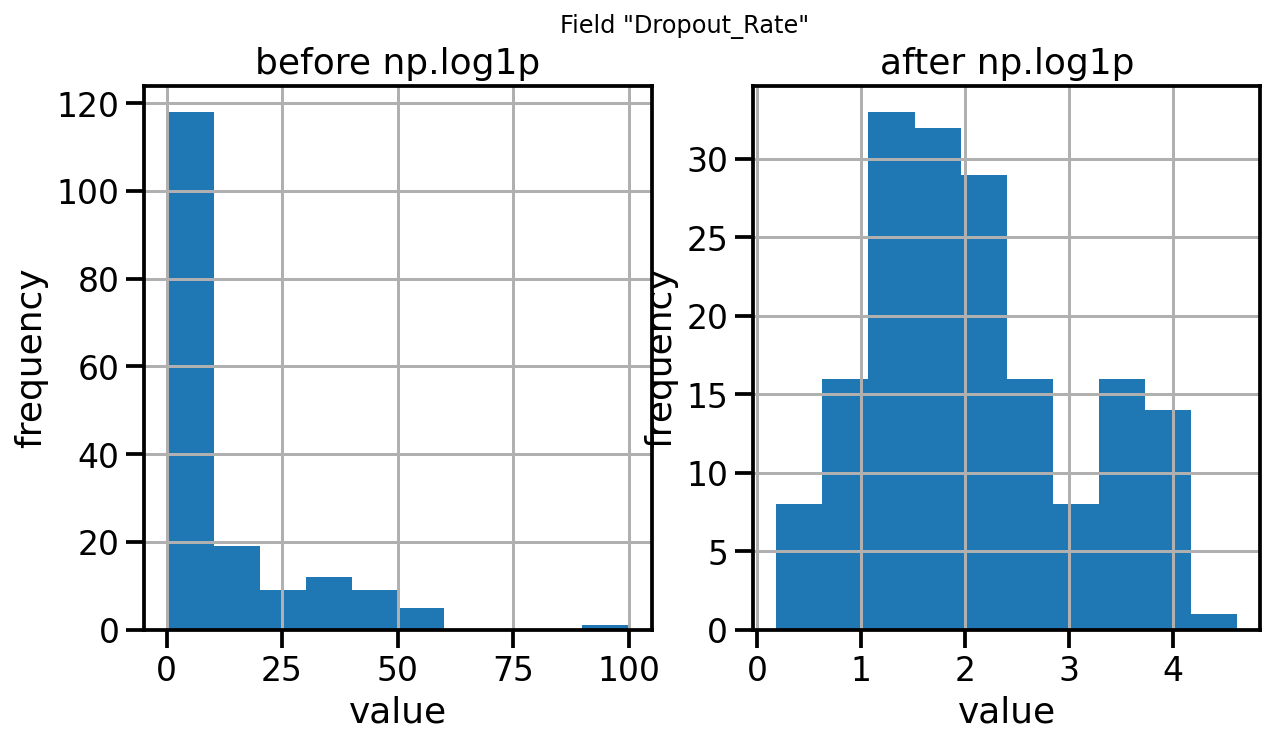

In [68]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "Dropout_Rate"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
subset_data[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
subset_data[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

## Key Findings and Insights

Initial analysis of the data shows the following:
- Schools with attainment scores of 'below average' and 'far below average' have considerable higher 'dropout rates' and lower rates of 'students on track'
- There is a strong correlation between student attendance and 'on track status' highlighting the fact that going to class is associated with higher student achievement, even though confounding factors may be at play'
- There is also negative  correlation between 'student on track' status and 'dropout rates'
- Suspensions are rare at higher performing schools and there is considerable variation between suspension rates even at lower performing schools. 
- There seems to be little variation in teacher attendence between different performing schools. 

## Hypothesis
Formulate 3 hypotheses about the dataset:

#### Hypothesis 1
H$_1$: There is a significant relationship between student attendence and student on track status.

H$_{0,1}$: There is no significant relationship between student attendence and student on track status

#### Hypothesis 2
H$_2$: Schools with higher attainment rating have better student outcomes as evidence by on track status

H$_{0,2}$: There is no significant difference between schools with different attainment levels 

#### Hypothesis 3
H$_3$: There is a significant relationship between student attendence and teacher attendence.

H$_{0,3}$: There is a significant relationship between student attendence and teacher attendence

I proceed to evaluate **Hypothesis 2** by comparing 'above average' and 'below average' schools. For this I do a t-test to identify whether both distributions have a significantly different mean for 'on track' status. 

## Hypothesis testing and interpretation of results

The conducted t-test between schools with above and below average attainment scores yield a **p-value of 0.02**, leading to rejection of the Null-hypothesis is being rejected. Therfore the test shows that indeed, schools with higher attainment rating have significantly different dropout rates from schools with low attainment. 

In [87]:
import scipy as scipy
OnTrack_AboveAvg=subset_data[subset_data['Attainment']=='ABOVE AVERAGE']['Freshman_OnTrack'].dropna()
OnTrack_BelowAvg=subset_data[subset_data['Attainment']=='BELOW AVERAGE']['Freshman_OnTrack'].dropna()
a = scipy.stats.ttest_ind(OnTrack_AboveAvg, OnTrack_BelowAvg, axis=0, equal_var=False)


Ttest_indResult(statistic=3.953208262890108, pvalue=0.022167363932964243)

## Hypothesis testing and interpretation of results

It would be interesting to perform further explanatory data analysis, e.g. investigate which factors intrinsic and extrinsic to schools contribute to sucessfuls school completion. To do so, one could fit a machine learning model to the data and then investigate which coeeficients/ features of the model have the highest explanatory power. 

## Additional Data Needed
The CPS school scorecard dataset only includes data that is collected within the school system. However educational outcomes are also highly dependent on socioeconomic and geographic factors. Therefore it would be good to merge the CPS dataset with other data sources such as census data or data about Chicago neighborhoods in oder to better understand which factors affect school quality and student success. 
